In [1]:
import gzip
import numpy as np
import matplotlib.pylab as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
%matplotlib notebook

In [155]:
labels_path = 'train-labels-idx1-ubyte.gz'
images_path = 'train-images-idx3-ubyte.gz'

# Read the images and labels
with gzip.open(labels_path, 'rb') as lpath:
    labels = np.frombuffer(lpath.read(), dtype=np.uint8, offset=8)
with gzip.open(images_path, 'rb') as ipath:
    images = np.frombuffer(ipath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

In [156]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [157]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


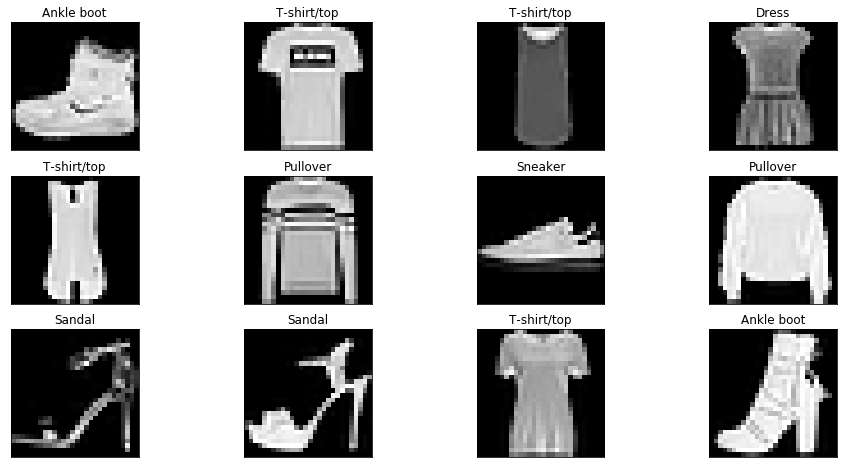

In [158]:
# show 16 smaples from the train set
plt.figure(figsize=(16,8))
n = 12
for i in range(0,n):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im = images[i].reshape([28,28])
    label = class_names[labels[i]]
    plt.imshow(im, cmap='gray', interpolation='nearest')
    plt.title(label)
plt.show()

# Part 1 Q1

Text(0.5, 1.0, 'KNN for differnet N values')

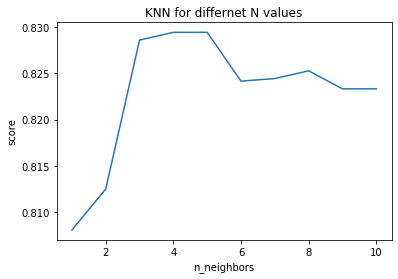

In [159]:
# Split to train set and validation set
xt, xv, yt, yv = train_test_split(images, labels, random_state=0, train_size=0.2, test_size=0.06)
scores = []

# For every n_neighbors param train the model and get the score 
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(xt,yt)
    scores.append(knn.score(xv, yv))
fig = plt.figure()
plt.plot(list(range(1,11)), scores)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.title("KNN for differnet N values")
fig.savefig("KNN for differnet N values.png")

In [185]:
print("Maximum score is {}, maximized by K={}".format(max(scores), np.argmax(np.array(scores))+1))

Maximum score is 0.8372222222222222, maximized by K=5


# Part 1 Q2

b)

In [197]:
pca = PCA(n_components=256)
imagesProjected = pca.fit_transform(images)

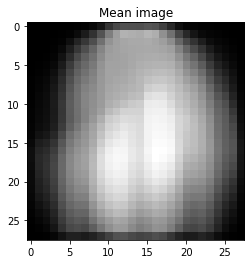

In [198]:
mean = pca.mean_
fig = plt.figure()
plt.title("Mean image")
plt.imshow(mean.reshape([28,28]), cmap='gray', interpolation='nearest')
fig.savefig("Q2b-Mean image.png")

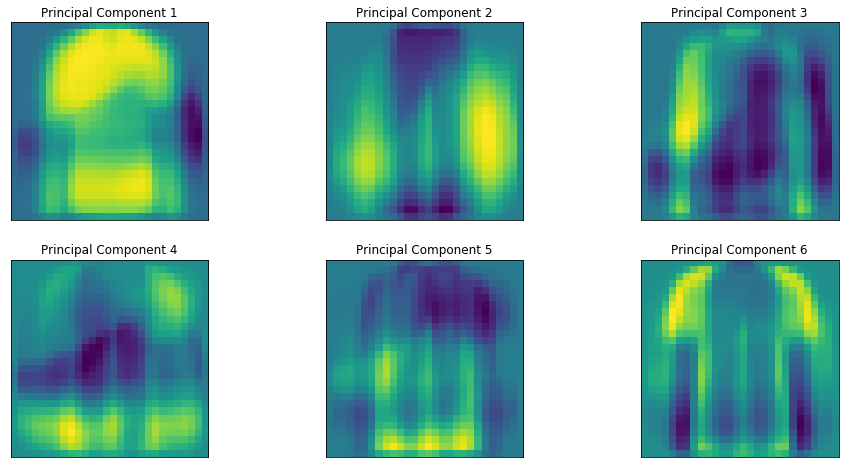

In [199]:

fig = plt.figure(figsize=(16,8))
n = 6
for i in range(0,n):
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im = pca.components_[i].reshape([28, 28])
    label = class_names[labels[i]]
    plt.imshow(im)
    plt.title("Principal Component {}".format(i+1))
plt.show()

fig.savefig("Q2C - Principal components.png")

c)

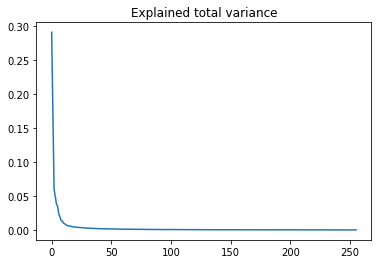

In [200]:
fig = plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.title("Explained total variance")
fig.savefig("Q2C-Explained total variance.png")

d)

In [201]:
sum95 = 0
sum80 = 0
notfound80 = True
i = 0

# Calculate the number of bases needed to reach % of varuance
while sum95 < 0.95:
    sum95 += pca.explained_variance_ratio_[i]
    if sum80 >= 0.8 and notfound80:
        print("Number of bases needed to reach 80% variance: {}".format(i+1))
        notfound80 = False
    else:
        if notfound80:
            sum80 += pca.explained_variance_ratio_[i]
    i +=1
print("Number of bases needed to reach 95% variance: {}".format(i+1))


Number of bases needed to reach 80% variance: 25
Number of bases needed to reach 95% variance: 189


e)

In [170]:
pca = PCA(n_components=2)
imagesPCA2 = pca.fit_transform(images)

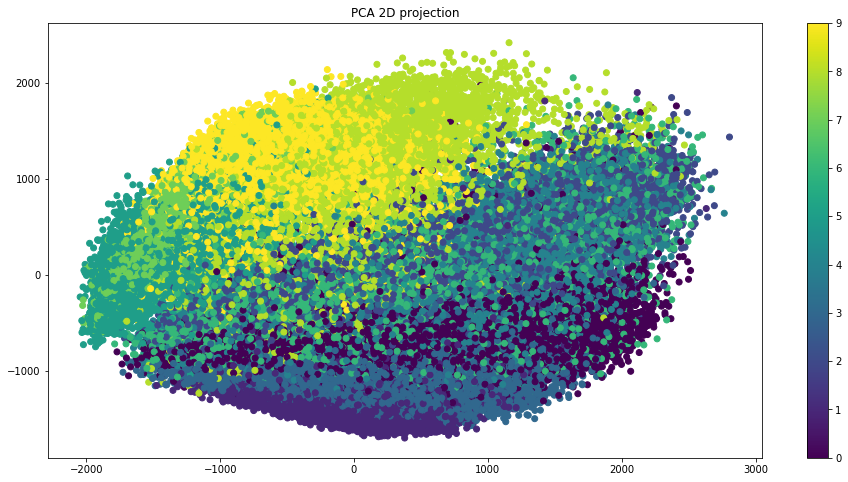

In [171]:
fig = plt.figure(figsize=(16,8))
plt.scatter(imagesPCA2[:,0], imagesPCA2[:,1], c=labels)
plt.colorbar()
plt.title("PCA 2D projection")
fig.savefig("Q2E-PCA 2D projection.png")

f)

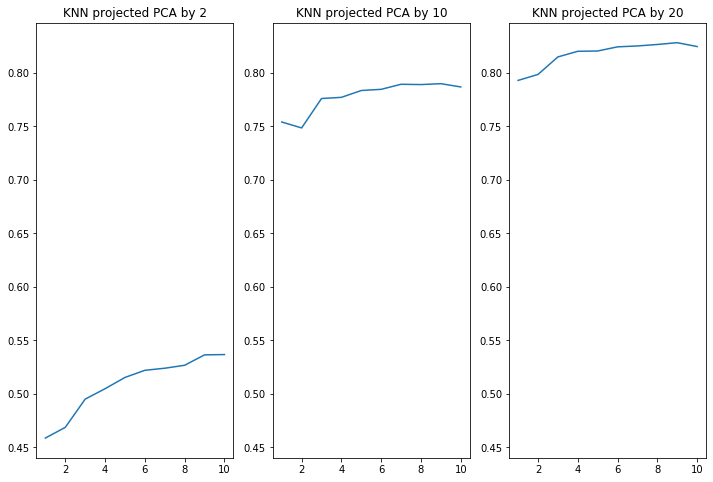

In [172]:
fig = plt.figure(figsize=(12,8))
i = 1
for N in [2, 10, 20]:
    plt.subplot(1,3,i, sharey=fig.gca())
    pca = PCA(n_components=N)
    
    # Project data to ND dimension
    imagesPCA = pca.fit_transform(images)
    xt, xv, yt, yv = train_test_split(imagesPCA, labels, random_state=0, train_size=0.2, test_size=0.06)
    scores = []
    for n in range(1,11):
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(xt,yt)
        scores.append(knn.score(xv, yv))
    plt.plot(list(range(1,11)), scores)
    plt.title("KNN projected PCA by {}".format(N))
    i += 1
fig.savefig("Q2F-KNNPCA.png")

g)

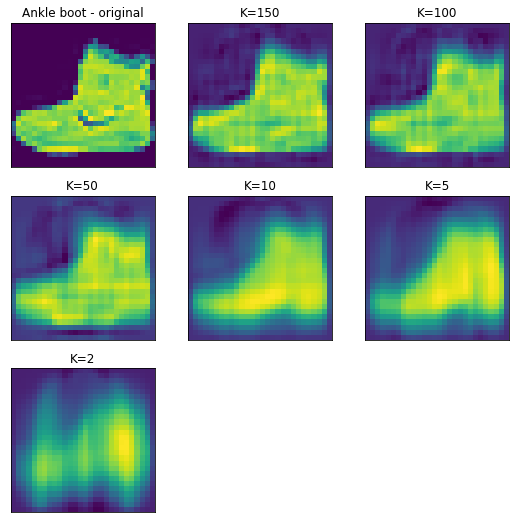

In [173]:
img = images[0]
im = img.reshape([28,28])
fig = plt.figure(figsize=(9, 9))
plt.subplot(3,3,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
label = class_names[labels[0]]
plt.imshow(im)
plt.title("{} - original".format(label))

i = 2
for k in [150, 100,50,10,5,2]:
    pca = PCA(n_components=k)
    pca.fit(images)
    # Project image to k dimension and recreate it from the projection
    img_pca = pca.inverse_transform(pca.transform([img]))
    im = img_pca.reshape([28,28])
    plt.subplot(3,3,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(im)
    plt.title("K={}".format(k))
    i += 1
    
fig.savefig("Q2G-PCAREVERSE.png")

# Part 1 Q3 - LDA

b)

In [175]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=9)
lda.fit(images, labels)

LinearDiscriminantAnalysis(n_components=9, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

c)

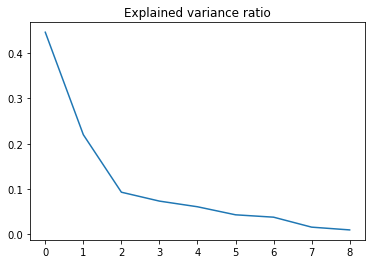

In [176]:
# c
fig = plt.figure()
plt.plot(lda.explained_variance_ratio_)
plt.title("Explained variance ratio")
fig.savefig("Q3C.png")

In [177]:
# d
sum95 = 0
sum80 = 0
notfound80 = True
i = 0
while sum95 < 0.95:
    sum95 += lda.explained_variance_ratio_[i]
    if sum80 >= 0.8 and notfound80:
        print("Number of bases needed to reach 80% variance: {}".format(i+1))
        notfound80 = False
    else:
        if notfound80:
            sum80 += lda.explained_variance_ratio_[i]
    i +=1
print("Number of bases needed to reach 95% variance: {}".format(i+1))

Number of bases needed to reach 80% variance: 5
Number of bases needed to reach 95% variance: 8


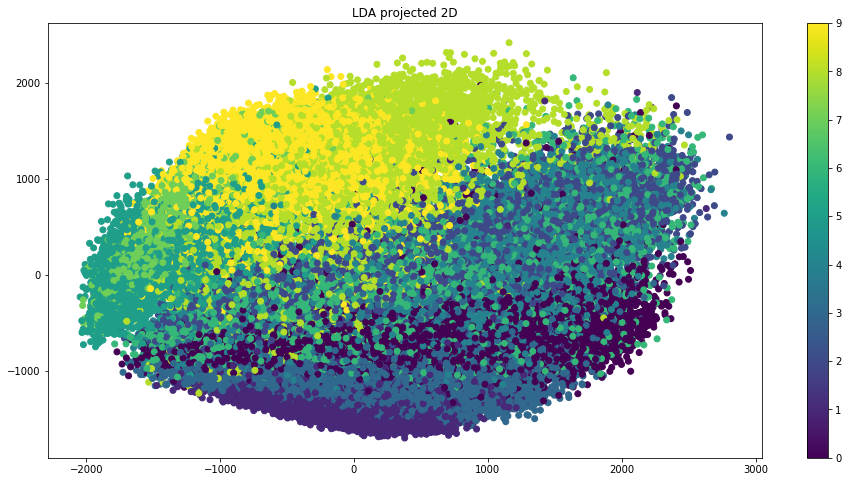

In [180]:
# e
lda = LinearDiscriminantAnalysis(n_components=2)
imagesLDA2 = pca.fit_transform(images, labels)

fig = plt.figure(figsize=(16,8))
plt.scatter(imagesLDA2[:,0], imagesLDA2[:,1], c=labels)
plt.colorbar()
plt.title("LDA projected 2D")
fig.savefig("Q3E.png")

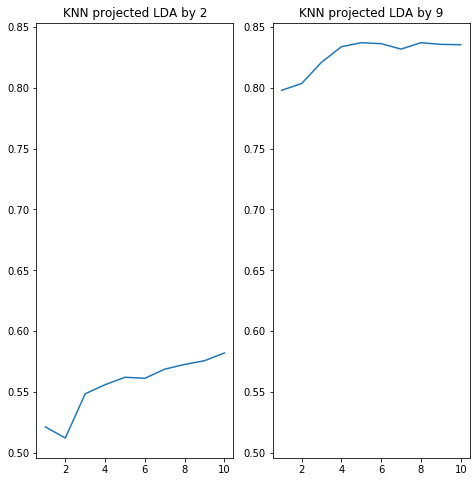

In [179]:
# f

fig = plt.figure(figsize=(12,8))
i = 1
for N in [2, 9]:
    plt.subplot(1,3,i, sharey=fig.gca())
    lda = LinearDiscriminantAnalysis(n_components=N)
    imagesLDA = lda.fit_transform(images, labels)
    xt, xv, yt, yv = train_test_split(imagesLDA, labels, random_state=0, train_size=0.2, test_size=0.06)
    scores = []
    for n in range(1,11):
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(xt,yt)
        scores.append(knn.score(xv, yv))
    plt.plot(list(range(1,11)), scores)
    plt.title("KNN projected LDA by {}".format(N))
    i += 1
fig.savefig("Q3F.png")

# Part 2
# Q1

In [204]:
import cv2

In [205]:
# section 1 train denseSIFT
sift = cv2.SIFT_create()

In [206]:
import os

# Read images from folder and return labels and images ndarray
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            labels.append(filename.split('_')[0])
    return (images, labels)

In [207]:
images, labels = load_images_from_folder('spatial_envelope_256x256_static_8outdoorcategories')

In [208]:
step_size = int(len(images[0]) ** (3/8))

# Matrix of images x descriptors
desc = np.ndarray((len(images),1024,128))
i = 0
for image in images:
    # Create grid for dense SIFT
    kp = [cv2.KeyPoint(x, y, step_size) for y in range(0, image.shape[0], step_size) 
                                    for x in range(0, image.shape[1], step_size)]
    # Compute denseSIFT descriptors for the grid
    (pts, descs) = sift.compute(image, kp)
    desc[i] = descs
    i += 1

In [7]:
# Spread to array of total descriptors
X = desc.reshape(desc.shape[0], -1)

In [8]:
label2Num = {'coast': 1, 'forest': 2, 'highway': 3, 'insidecity': 4, 'mountain': 5, 'opencountry': 6, 'street': 7, 'tallbuilding': 8}

In [9]:
labelNums = []

# Create numberic values for labels
for label in labels:
    labelNums.append(label2Num[label])

labelNums = np.array(labelNums)

In [10]:
# reshape descriptiors data to contain only descriptors
X = desc.reshape(desc.shape[0]*desc.shape[1], desc.shape[2])

# reshape and restructure labels data in order to corrilate with the descriptors
o = np.ones((1, desc.shape[1]))
y = labelNums.reshape(labelNums.shape[0], 1) @ o
y = y.reshape(-1)

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8, test_size=0.2)

In [11]:
from sklearn.cluster import KMeans, MiniBatchKMeans
n_clust = 128

kmeans = MiniBatchKMeans(n_clusters=n_clust, batch_size=1000, verbose=True)
%time kmeans.fit(x_train)

Init 1/3 with method: k-means++
Inertia for init 1/3: 227689516.960558
Init 2/3 with method: k-means++
Inertia for init 2/3: 227065953.076765
Init 3/3 with method: k-means++
Inertia for init 3/3: 226745554.441750
Minibatch iteration 1/220300: mean batch inertia: 80760.367373, ewa inertia: 80760.367373 
Minibatch iteration 2/220300: mean batch inertia: 80568.164770, ewa inertia: 80760.192803 
Minibatch iteration 3/220300: mean batch inertia: 78208.972248, ewa inertia: 80757.875629 
Minibatch iteration 4/220300: mean batch inertia: 80584.717570, ewa inertia: 80757.718356 
Minibatch iteration 5/220300: mean batch inertia: 79250.689798, ewa inertia: 80756.349580 
Minibatch iteration 6/220300: mean batch inertia: 79210.182817, ewa inertia: 80754.945257 
Minibatch iteration 7/220300: mean batch inertia: 76841.170733, ewa inertia: 80751.390528 
Minibatch iteration 8/220300: mean batch inertia: 77346.360596, ewa inertia: 80748.297872 
Minibatch iteration 9/220300: mean batch inertia: 76673.777

Minibatch iteration 96/220300: mean batch inertia: 75000.594989, ewa inertia: 80409.043257 
Minibatch iteration 97/220300: mean batch inertia: 75429.689083, ewa inertia: 80404.520704 
Minibatch iteration 98/220300: mean batch inertia: 76075.892540, ewa inertia: 80400.589179 
Minibatch iteration 99/220300: mean batch inertia: 74503.924245, ewa inertia: 80395.233468 
Minibatch iteration 100/220300: mean batch inertia: 76465.782405, ewa inertia: 80391.664500 
Minibatch iteration 101/220300: mean batch inertia: 75321.128981, ewa inertia: 80387.059130 
Minibatch iteration 102/220300: mean batch inertia: 76244.031501, ewa inertia: 80383.296179 
Minibatch iteration 103/220300: mean batch inertia: 76429.652290, ewa inertia: 80379.705238 
Minibatch iteration 104/220300: mean batch inertia: 77714.125050, ewa inertia: 80377.284196 
Minibatch iteration 105/220300: mean batch inertia: 75601.033028, ewa inertia: 80372.946113 
Minibatch iteration 106/220300: mean batch inertia: 77054.903019, ewa iner

Minibatch iteration 189/220300: mean batch inertia: 76293.706306, ewa inertia: 80038.230806 
Minibatch iteration 190/220300: mean batch inertia: 76176.717268, ewa inertia: 80034.723543 
Minibatch iteration 191/220300: mean batch inertia: 77130.312041, ewa inertia: 80032.085579 
Minibatch iteration 192/220300: mean batch inertia: 75001.617805, ewa inertia: 80027.516601 
Minibatch iteration 193/220300: mean batch inertia: 75138.112355, ewa inertia: 80023.075746 
Minibatch iteration 194/220300: mean batch inertia: 76192.910579, ewa inertia: 80019.596956 
Minibatch iteration 195/220300: mean batch inertia: 75575.560328, ewa inertia: 80015.560610 
Minibatch iteration 196/220300: mean batch inertia: 76210.555427, ewa inertia: 80012.104672 
Minibatch iteration 197/220300: mean batch inertia: 76098.257476, ewa inertia: 80008.549877 
Minibatch iteration 198/220300: mean batch inertia: 75420.509308, ewa inertia: 80004.382738 
Minibatch iteration 199/220300: mean batch inertia: 74084.644466, ewa 

Minibatch iteration 279/220300: mean batch inertia: 75985.936481, ewa inertia: 79685.710722 
Minibatch iteration 280/220300: mean batch inertia: 76219.984131, ewa inertia: 79682.562937 
Minibatch iteration 281/220300: mean batch inertia: 75492.995328, ewa inertia: 79678.757716 
Minibatch iteration 282/220300: mean batch inertia: 74273.332336, ewa inertia: 79673.848179 
Minibatch iteration 283/220300: mean batch inertia: 74639.930231, ewa inertia: 79669.276067 
Minibatch iteration 284/220300: mean batch inertia: 74570.809100, ewa inertia: 79664.645328 
Minibatch iteration 285/220300: mean batch inertia: 74463.079285, ewa inertia: 79659.920948 
Minibatch iteration 286/220300: mean batch inertia: 75639.111841, ewa inertia: 79656.269003 
Minibatch iteration 287/220300: mean batch inertia: 76434.189631, ewa inertia: 79653.342514 
Minibatch iteration 288/220300: mean batch inertia: 76304.335940, ewa inertia: 79650.300741 
Minibatch iteration 289/220300: mean batch inertia: 74280.488268, ewa 

Minibatch iteration 374/220300: mean batch inertia: 75680.271029, ewa inertia: 79323.971830 
Minibatch iteration 375/220300: mean batch inertia: 74787.123773, ewa inertia: 79319.851187 
Minibatch iteration 376/220300: mean batch inertia: 74581.025828, ewa inertia: 79315.547097 
Minibatch iteration 377/220300: mean batch inertia: 75549.000026, ewa inertia: 79312.126088 
Minibatch iteration 378/220300: mean batch inertia: 75136.223647, ewa inertia: 79308.333279 
Minibatch iteration 379/220300: mean batch inertia: 74877.270495, ewa inertia: 79304.308717 
Minibatch iteration 380/220300: mean batch inertia: 75552.589479, ewa inertia: 79300.901176 
Minibatch iteration 381/220300: mean batch inertia: 74638.814826, ewa inertia: 79296.666785 
Minibatch iteration 382/220300: mean batch inertia: 75412.826692, ewa inertia: 79293.139244 
Minibatch iteration 383/220300: mean batch inertia: 74439.881819, ewa inertia: 79288.731219 
Minibatch iteration 384/220300: mean batch inertia: 76994.869756, ewa 

Minibatch iteration 466/220300: mean batch inertia: 76790.124820, ewa inertia: 79016.973797 
Minibatch iteration 467/220300: mean batch inertia: 75427.481935, ewa inertia: 79013.713602 
Minibatch iteration 468/220300: mean batch inertia: 75816.847453, ewa inertia: 79010.810012 
Minibatch iteration 469/220300: mean batch inertia: 76072.868750, ewa inertia: 79008.141595 
Minibatch iteration 470/220300: mean batch inertia: 76127.696859, ewa inertia: 79005.525399 
Minibatch iteration 471/220300: mean batch inertia: 75448.949026, ewa inertia: 79002.295099 
Minibatch iteration 472/220300: mean batch inertia: 75347.525742, ewa inertia: 78998.975614 
Minibatch iteration 473/220300: mean batch inertia: 74567.071480, ewa inertia: 78994.950288 
Minibatch iteration 474/220300: mean batch inertia: 75383.870152, ewa inertia: 78991.670484 
Minibatch iteration 475/220300: mean batch inertia: 75502.390643, ewa inertia: 78988.501307 
Minibatch iteration 476/220300: mean batch inertia: 75600.339866, ewa 

Minibatch iteration 555/220300: mean batch inertia: 74723.534528, ewa inertia: 78728.657511 
Minibatch iteration 556/220300: mean batch inertia: 75847.748926, ewa inertia: 78726.040894 
Minibatch iteration 557/220300: mean batch inertia: 75213.413330, ewa inertia: 78722.850511 
Minibatch iteration 558/220300: mean batch inertia: 75207.988172, ewa inertia: 78719.658099 
Minibatch iteration 559/220300: mean batch inertia: 74451.763880, ewa inertia: 78715.781736 
Minibatch iteration 560/220300: mean batch inertia: 76228.248271, ewa inertia: 78713.522406 
Minibatch iteration 561/220300: mean batch inertia: 75405.230546, ewa inertia: 78710.517614 
Minibatch iteration 562/220300: mean batch inertia: 73288.916397, ewa inertia: 78705.593384 
Minibatch iteration 563/220300: mean batch inertia: 77380.856484, ewa inertia: 78704.390177 
Minibatch iteration 564/220300: mean batch inertia: 75491.837731, ewa inertia: 78701.472341 
Minibatch iteration 565/220300: mean batch inertia: 76378.324802, ewa 

Minibatch iteration 651/220300: mean batch inertia: 74898.991208, ewa inertia: 78438.800858 
Minibatch iteration 652/220300: mean batch inertia: 75758.003369, ewa inertia: 78436.365994 
Minibatch iteration 653/220300: mean batch inertia: 75104.779098, ewa inertia: 78433.340044 
Minibatch iteration 654/220300: mean batch inertia: 75635.182402, ewa inertia: 78430.798586 
Minibatch iteration 655/220300: mean batch inertia: 73843.797470, ewa inertia: 78426.632391 
Minibatch iteration 656/220300: mean batch inertia: 74439.632856, ewa inertia: 78423.011155 
Minibatch iteration 657/220300: mean batch inertia: 75621.402172, ewa inertia: 78420.466562 
Minibatch iteration 658/220300: mean batch inertia: 76943.115481, ewa inertia: 78419.124742 
Minibatch iteration 659/220300: mean batch inertia: 76580.966595, ewa inertia: 78417.455214 
Minibatch iteration 660/220300: mean batch inertia: 74885.319526, ewa inertia: 78414.247113 
Minibatch iteration 661/220300: mean batch inertia: 75091.798952, ewa 

Minibatch iteration 748/220300: mean batch inertia: 75719.810680, ewa inertia: 78172.038350 
Minibatch iteration 749/220300: mean batch inertia: 74516.950779, ewa inertia: 78168.718576 
Minibatch iteration 750/220300: mean batch inertia: 75879.425137, ewa inertia: 78166.639300 
Minibatch iteration 751/220300: mean batch inertia: 75496.544906, ewa inertia: 78164.214157 
Minibatch iteration 752/220300: mean batch inertia: 75086.824769, ewa inertia: 78161.419084 
Minibatch iteration 753/220300: mean batch inertia: 74317.941211, ewa inertia: 78157.928203 
Minibatch iteration 754/220300: mean batch inertia: 74355.638238, ewa inertia: 78154.474731 
Minibatch iteration 755/220300: mean batch inertia: 76228.727043, ewa inertia: 78152.725649 
Minibatch iteration 756/220300: mean batch inertia: 75426.995857, ewa inertia: 78150.249975 
Minibatch iteration 757/220300: mean batch inertia: 76021.441343, ewa inertia: 78148.316461 
Minibatch iteration 758/220300: mean batch inertia: 76001.737471, ewa 

Minibatch iteration 836/220300: mean batch inertia: 75139.684668, ewa inertia: 77955.138419 
Minibatch iteration 837/220300: mean batch inertia: 75209.806853, ewa inertia: 77952.644941 
Minibatch iteration 838/220300: mean batch inertia: 74438.630794, ewa inertia: 77949.453299 
Minibatch iteration 839/220300: mean batch inertia: 74193.685024, ewa inertia: 77946.042081 
Minibatch iteration 840/220300: mean batch inertia: 75868.342915, ewa inertia: 77944.154987 
Minibatch iteration 841/220300: mean batch inertia: 75920.183153, ewa inertia: 77942.316692 
Minibatch iteration 842/220300: mean batch inertia: 74571.114192, ewa inertia: 77939.254760 
Minibatch iteration 843/220300: mean batch inertia: 74502.580623, ewa inertia: 77936.133363 
Minibatch iteration 844/220300: mean batch inertia: 74747.644324, ewa inertia: 77933.237382 
Minibatch iteration 845/220300: mean batch inertia: 75612.999114, ewa inertia: 77931.130000 
Minibatch iteration 846/220300: mean batch inertia: 76295.792092, ewa 

Minibatch iteration 926/220300: mean batch inertia: 74330.058789, ewa inertia: 77735.857293 
Minibatch iteration 927/220300: mean batch inertia: 75027.729984, ewa inertia: 77733.397606 
Minibatch iteration 928/220300: mean batch inertia: 74822.865554, ewa inertia: 77730.754083 
Minibatch iteration 929/220300: mean batch inertia: 74621.184090, ewa inertia: 77727.929782 
Minibatch iteration 930/220300: mean batch inertia: 75384.066420, ewa inertia: 77725.800942 
Minibatch iteration 931/220300: mean batch inertia: 74260.757239, ewa inertia: 77722.653778 
Minibatch iteration 932/220300: mean batch inertia: 74047.293401, ewa inertia: 77719.315591 
Minibatch iteration 933/220300: mean batch inertia: 74703.096432, ewa inertia: 77716.576076 
Minibatch iteration 934/220300: mean batch inertia: 73807.772297, ewa inertia: 77713.025862 
Minibatch iteration 935/220300: mean batch inertia: 75743.916891, ewa inertia: 77711.237397 
Minibatch iteration 936/220300: mean batch inertia: 75440.474878, ewa 

Minibatch iteration 1019/220300: mean batch inertia: 74933.030705, ewa inertia: 77530.593737 
Minibatch iteration 1020/220300: mean batch inertia: 76956.229107, ewa inertia: 77530.072064 
Minibatch iteration 1021/220300: mean batch inertia: 75318.799847, ewa inertia: 77528.063651 
Minibatch iteration 1022/220300: mean batch inertia: 76264.111163, ewa inertia: 77526.915653 
Minibatch iteration 1023/220300: mean batch inertia: 76033.728439, ewa inertia: 77525.559449 
Minibatch iteration 1024/220300: mean batch inertia: 73726.414864, ewa inertia: 77522.108834 
Minibatch iteration 1025/220300: mean batch inertia: 74224.948241, ewa inertia: 77519.114151 
Minibatch iteration 1026/220300: mean batch inertia: 76147.977204, ewa inertia: 77517.868801 
Minibatch iteration 1027/220300: mean batch inertia: 75503.366938, ewa inertia: 77516.039107 
Minibatch iteration 1028/220300: mean batch inertia: 75798.806536, ewa inertia: 77514.479411 
Minibatch iteration 1029/220300: mean batch inertia: 74269.7

Minibatch iteration 1111/220300: mean batch inertia: 74235.856925, ewa inertia: 77346.595382 
Minibatch iteration 1112/220300: mean batch inertia: 75665.742684, ewa inertia: 77345.068729 
Minibatch iteration 1113/220300: mean batch inertia: 75300.798812, ewa inertia: 77343.211998 
Minibatch iteration 1114/220300: mean batch inertia: 76659.867080, ewa inertia: 77342.591343 
Minibatch iteration 1115/220300: mean batch inertia: 74131.182579, ewa inertia: 77339.674545 
Minibatch iteration 1116/220300: mean batch inertia: 74987.028195, ewa inertia: 77337.537728 
Minibatch iteration 1117/220300: mean batch inertia: 74864.348481, ewa inertia: 77335.291426 
Minibatch iteration 1118/220300: mean batch inertia: 76661.744464, ewa inertia: 77334.679670 
Minibatch iteration 1119/220300: mean batch inertia: 73848.500705, ewa inertia: 77331.513309 
Minibatch iteration 1120/220300: mean batch inertia: 74525.699875, ewa inertia: 77328.964898 
Minibatch iteration 1121/220300: mean batch inertia: 75515.2

Minibatch iteration 1205/220300: mean batch inertia: 77212.341933, ewa inertia: 77171.041138 
Minibatch iteration 1206/220300: mean batch inertia: 74934.032312, ewa inertia: 77169.009350 
Minibatch iteration 1207/220300: mean batch inertia: 75228.663647, ewa inertia: 77167.247010 
Minibatch iteration 1208/220300: mean batch inertia: 75297.886915, ewa inertia: 77165.549143 
Minibatch iteration 1209/220300: mean batch inertia: 75719.744692, ewa inertia: 77164.235975 
Minibatch iteration 1210/220300: mean batch inertia: 74097.913303, ewa inertia: 77161.450953 
Minibatch iteration 1211/220300: mean batch inertia: 74405.929997, ewa inertia: 77158.948221 
Minibatch iteration 1212/220300: mean batch inertia: 74844.370446, ewa inertia: 77156.845980 
Minibatch iteration 1213/220300: mean batch inertia: 74331.481894, ewa inertia: 77154.279812 
Minibatch iteration 1214/220300: mean batch inertia: 76039.967798, ewa inertia: 77153.267725 
Minibatch iteration 1215/220300: mean batch inertia: 76239.8

Minibatch iteration 1293/220300: mean batch inertia: 76225.140732, ewa inertia: 77026.606623 
Minibatch iteration 1294/220300: mean batch inertia: 75122.915474, ewa inertia: 77024.877574 
Minibatch iteration 1295/220300: mean batch inertia: 74083.059331, ewa inertia: 77022.205635 
Minibatch iteration 1296/220300: mean batch inertia: 75532.070771, ewa inertia: 77020.852204 
Minibatch iteration 1297/220300: mean batch inertia: 75821.168967, ewa inertia: 77019.762578 
Minibatch iteration 1298/220300: mean batch inertia: 75442.536359, ewa inertia: 77018.330045 
Minibatch iteration 1299/220300: mean batch inertia: 75137.543439, ewa inertia: 77016.621799 
Minibatch iteration 1300/220300: mean batch inertia: 73826.111881, ewa inertia: 77013.723983 
Minibatch iteration 1301/220300: mean batch inertia: 75347.129682, ewa inertia: 77012.210281 
Minibatch iteration 1302/220300: mean batch inertia: 75085.348654, ewa inertia: 77010.460187 
Minibatch iteration 1303/220300: mean batch inertia: 75747.4

Minibatch iteration 1388/220300: mean batch inertia: 75060.992305, ewa inertia: 76882.115455 
Minibatch iteration 1389/220300: mean batch inertia: 74032.022374, ewa inertia: 76879.526826 
Minibatch iteration 1390/220300: mean batch inertia: 75214.648629, ewa inertia: 76878.014682 
Minibatch iteration 1391/220300: mean batch inertia: 76518.272624, ewa inertia: 76877.687942 
Minibatch iteration 1392/220300: mean batch inertia: 75839.533108, ewa inertia: 76876.745027 
Minibatch iteration 1393/220300: mean batch inertia: 75041.391874, ewa inertia: 76875.078047 
Minibatch iteration 1394/220300: mean batch inertia: 74025.590240, ewa inertia: 76872.489968 
Minibatch iteration 1395/220300: mean batch inertia: 76206.895998, ewa inertia: 76871.885435 
Minibatch iteration 1396/220300: mean batch inertia: 75104.092708, ewa inertia: 76870.279818 
Minibatch iteration 1397/220300: mean batch inertia: 74476.860100, ewa inertia: 76868.105968 
Minibatch iteration 1398/220300: mean batch inertia: 74594.0

Minibatch iteration 1481/220300: mean batch inertia: 73173.645276, ewa inertia: 76748.234501 
Minibatch iteration 1482/220300: mean batch inertia: 74461.226335, ewa inertia: 76746.157301 
Minibatch iteration 1483/220300: mean batch inertia: 74670.964215, ewa inertia: 76744.272483 
Minibatch iteration 1484/220300: mean batch inertia: 75501.106068, ewa inertia: 76743.143364 
Minibatch iteration 1485/220300: mean batch inertia: 76315.078595, ewa inertia: 76742.754569 
Minibatch iteration 1486/220300: mean batch inertia: 76009.151324, ewa inertia: 76742.088266 
Minibatch iteration 1487/220300: mean batch inertia: 74777.432388, ewa inertia: 76740.303845 
Minibatch iteration 1488/220300: mean batch inertia: 74937.833993, ewa inertia: 76738.666732 
Minibatch iteration 1489/220300: mean batch inertia: 76970.555969, ewa inertia: 76738.877348 
Minibatch iteration 1490/220300: mean batch inertia: 76213.030467, ewa inertia: 76738.399742 
Minibatch iteration 1491/220300: mean batch inertia: 73946.0

Minibatch iteration 1569/220300: mean batch inertia: 74673.035239, ewa inertia: 76624.024883 
Minibatch iteration 1570/220300: mean batch inertia: 76143.992071, ewa inertia: 76623.588888 
Minibatch iteration 1571/220300: mean batch inertia: 73749.247712, ewa inertia: 76620.978236 
Minibatch iteration 1572/220300: mean batch inertia: 75615.681151, ewa inertia: 76620.065163 
Minibatch iteration 1573/220300: mean batch inertia: 74985.737790, ewa inertia: 76618.580767 
Minibatch iteration 1574/220300: mean batch inertia: 76770.488962, ewa inertia: 76618.718740 
Minibatch iteration 1575/220300: mean batch inertia: 74316.360498, ewa inertia: 76616.627597 
Minibatch iteration 1576/220300: mean batch inertia: 75268.354085, ewa inertia: 76615.403013 
Minibatch iteration 1577/220300: mean batch inertia: 74082.314120, ewa inertia: 76613.102307 
Minibatch iteration 1578/220300: mean batch inertia: 74923.002602, ewa inertia: 76611.567255 
Minibatch iteration 1579/220300: mean batch inertia: 75179.0

Minibatch iteration 1663/220300: mean batch inertia: 74407.969381, ewa inertia: 76506.055088 
Minibatch iteration 1664/220300: mean batch inertia: 75482.218637, ewa inertia: 76505.125177 
Minibatch iteration 1665/220300: mean batch inertia: 75362.724797, ewa inertia: 76504.087579 
Minibatch iteration 1666/220300: mean batch inertia: 77415.789653, ewa inertia: 76504.915642 
Minibatch iteration 1667/220300: mean batch inertia: 75330.871919, ewa inertia: 76503.849304 
Minibatch iteration 1668/220300: mean batch inertia: 74230.278362, ewa inertia: 76501.784308 
Minibatch iteration 1669/220300: mean batch inertia: 74649.275398, ewa inertia: 76500.101746 
Minibatch iteration 1670/220300: mean batch inertia: 76591.901674, ewa inertia: 76500.185125 
Minibatch iteration 1671/220300: mean batch inertia: 74980.978771, ewa inertia: 76498.805289 
Minibatch iteration 1672/220300: mean batch inertia: 74188.949347, ewa inertia: 76496.707336 
Minibatch iteration 1673/220300: mean batch inertia: 74926.4

Minibatch iteration 1751/220300: mean batch inertia: 75608.876273, ewa inertia: 76401.101795 
Minibatch iteration 1752/220300: mean batch inertia: 73814.027381, ewa inertia: 76398.752056 
Minibatch iteration 1753/220300: mean batch inertia: 74404.461310, ewa inertia: 76396.940719 
Minibatch iteration 1754/220300: mean batch inertia: 75438.687512, ewa inertia: 76396.070375 
Minibatch iteration 1755/220300: mean batch inertia: 74348.216823, ewa inertia: 76394.210390 
Minibatch iteration 1756/220300: mean batch inertia: 75622.693297, ewa inertia: 76393.509651 
Minibatch iteration 1757/220300: mean batch inertia: 77112.409157, ewa inertia: 76394.162599 
Minibatch iteration 1758/220300: mean batch inertia: 75021.036695, ewa inertia: 76392.915442 
Minibatch iteration 1759/220300: mean batch inertia: 75341.854583, ewa inertia: 76391.960805 
Minibatch iteration 1760/220300: mean batch inertia: 76105.689559, ewa inertia: 76391.700796 
Minibatch iteration 1761/220300: mean batch inertia: 74265.4

Minibatch iteration 1843/220300: mean batch inertia: 74319.169612, ewa inertia: 76301.728741 
Minibatch iteration 1844/220300: mean batch inertia: 74549.696326, ewa inertia: 76300.137438 
Minibatch iteration 1845/220300: mean batch inertia: 74273.104500, ewa inertia: 76298.296363 
Minibatch iteration 1846/220300: mean batch inertia: 75687.930968, ewa inertia: 76297.741992 
Minibatch iteration 1847/220300: mean batch inertia: 74911.580525, ewa inertia: 76296.482995 
Minibatch iteration 1848/220300: mean batch inertia: 74997.587520, ewa inertia: 76295.303259 
Minibatch iteration 1849/220300: mean batch inertia: 74247.949531, ewa inertia: 76293.443727 
Minibatch iteration 1850/220300: mean batch inertia: 76237.845741, ewa inertia: 76293.393230 
Minibatch iteration 1851/220300: mean batch inertia: 75731.538340, ewa inertia: 76292.882919 
Minibatch iteration 1852/220300: mean batch inertia: 75984.090029, ewa inertia: 76292.602454 
Minibatch iteration 1853/220300: mean batch inertia: 76022.2

Minibatch iteration 1937/220300: mean batch inertia: 75449.684727, ewa inertia: 76215.413139 
Minibatch iteration 1938/220300: mean batch inertia: 75570.168199, ewa inertia: 76214.827088 
Minibatch iteration 1939/220300: mean batch inertia: 75258.066301, ewa inertia: 76213.958099 
Minibatch iteration 1940/220300: mean batch inertia: 75015.450670, ewa inertia: 76212.869542 
Minibatch iteration 1941/220300: mean batch inertia: 75847.007578, ewa inertia: 76212.537244 
Minibatch iteration 1942/220300: mean batch inertia: 75205.219788, ewa inertia: 76211.622336 
Minibatch iteration 1943/220300: mean batch inertia: 76823.676311, ewa inertia: 76212.178241 
Minibatch iteration 1944/220300: mean batch inertia: 75469.607687, ewa inertia: 76211.503793 
Minibatch iteration 1945/220300: mean batch inertia: 76652.132896, ewa inertia: 76211.903999 
Minibatch iteration 1946/220300: mean batch inertia: 76088.364002, ewa inertia: 76211.791793 
Minibatch iteration 1947/220300: mean batch inertia: 74348.0

Minibatch iteration 2028/220300: mean batch inertia: 75405.557089, ewa inertia: 76139.771837 
Minibatch iteration 2029/220300: mean batch inertia: 74841.773263, ewa inertia: 76138.592915 
Minibatch iteration 2030/220300: mean batch inertia: 76002.736636, ewa inertia: 76138.469522 
Minibatch iteration 2031/220300: mean batch inertia: 74813.442458, ewa inertia: 76137.266052 
Minibatch iteration 2032/220300: mean batch inertia: 74944.729196, ewa inertia: 76136.182917 
Minibatch iteration 2033/220300: mean batch inertia: 74140.723478, ewa inertia: 76134.370519 
Minibatch iteration 2034/220300: mean batch inertia: 74108.107410, ewa inertia: 76132.530143 
Minibatch iteration 2035/220300: mean batch inertia: 74525.752761, ewa inertia: 76131.070770 
Minibatch iteration 2036/220300: mean batch inertia: 76637.122374, ewa inertia: 76131.530397 
Minibatch iteration 2037/220300: mean batch inertia: 75177.735150, ewa inertia: 76130.664101 
Minibatch iteration 2038/220300: mean batch inertia: 75540.7

Minibatch iteration 2125/220300: mean batch inertia: 75831.548254, ewa inertia: 76057.485502 
Minibatch iteration 2126/220300: mean batch inertia: 75512.780322, ewa inertia: 76056.990768 
Minibatch iteration 2127/220300: mean batch inertia: 73803.484625, ewa inertia: 76054.943996 
Minibatch iteration 2128/220300: mean batch inertia: 74262.433705, ewa inertia: 76053.315928 
Minibatch iteration 2129/220300: mean batch inertia: 76006.671825, ewa inertia: 76053.273563 
Minibatch iteration 2130/220300: mean batch inertia: 75392.341831, ewa inertia: 76052.673265 
Minibatch iteration 2131/220300: mean batch inertia: 75083.654838, ewa inertia: 76051.793143 
Minibatch iteration 2132/220300: mean batch inertia: 74208.985613, ewa inertia: 76050.119393 
Minibatch iteration 2133/220300: mean batch inertia: 74491.497146, ewa inertia: 76048.703757 
Minibatch iteration 2134/220300: mean batch inertia: 75373.482427, ewa inertia: 76048.090479 
Minibatch iteration 2135/220300: mean batch inertia: 73925.3

Minibatch iteration 2216/220300: mean batch inertia: 75388.048625, ewa inertia: 75981.708862 
Minibatch iteration 2217/220300: mean batch inertia: 75515.518304, ewa inertia: 75981.285439 
Minibatch iteration 2218/220300: mean batch inertia: 76169.989684, ewa inertia: 75981.456832 
Minibatch iteration 2219/220300: mean batch inertia: 76360.082641, ewa inertia: 75981.800723 
Minibatch iteration 2220/220300: mean batch inertia: 75957.915309, ewa inertia: 75981.779029 
Minibatch iteration 2221/220300: mean batch inertia: 74833.693622, ewa inertia: 75980.736267 
Minibatch iteration 2222/220300: mean batch inertia: 74163.239995, ewa inertia: 75979.085506 
Minibatch iteration 2223/220300: mean batch inertia: 74833.542681, ewa inertia: 75978.045054 
Minibatch iteration 2224/220300: mean batch inertia: 74380.025940, ewa inertia: 75976.593636 
Minibatch iteration 2225/220300: mean batch inertia: 76145.854148, ewa inertia: 75976.747368 
Minibatch iteration 2226/220300: mean batch inertia: 75921.6

Minibatch iteration 2310/220300: mean batch inertia: 76046.025373, ewa inertia: 75913.195553 
Minibatch iteration 2311/220300: mean batch inertia: 76687.914897, ewa inertia: 75913.899201 
Minibatch iteration 2312/220300: mean batch inertia: 75405.345617, ewa inertia: 75913.437301 
Minibatch iteration 2313/220300: mean batch inertia: 74115.698124, ewa inertia: 75911.804485 
Minibatch iteration 2314/220300: mean batch inertia: 76296.694960, ewa inertia: 75912.154066 
Minibatch iteration 2315/220300: mean batch inertia: 76126.428174, ewa inertia: 75912.348683 
Minibatch iteration 2316/220300: mean batch inertia: 75829.498915, ewa inertia: 75912.273434 
Minibatch iteration 2317/220300: mean batch inertia: 75481.231719, ewa inertia: 75911.881935 
Minibatch iteration 2318/220300: mean batch inertia: 75924.903709, ewa inertia: 75911.893762 
Minibatch iteration 2319/220300: mean batch inertia: 75330.254407, ewa inertia: 75911.365482 
Minibatch iteration 2320/220300: mean batch inertia: 75933.6

Minibatch iteration 2402/220300: mean batch inertia: 75406.104055, ewa inertia: 75849.750045 
Minibatch iteration 2403/220300: mean batch inertia: 75524.566107, ewa inertia: 75849.454693 
Minibatch iteration 2404/220300: mean batch inertia: 73732.436352, ewa inertia: 75847.531887 
Minibatch iteration 2405/220300: mean batch inertia: 74367.667397, ewa inertia: 75846.187784 
Minibatch iteration 2406/220300: mean batch inertia: 74987.404006, ewa inertia: 75845.407784 
Minibatch iteration 2407/220300: mean batch inertia: 75073.622759, ewa inertia: 75844.706802 
Minibatch iteration 2408/220300: mean batch inertia: 75889.659413, ewa inertia: 75844.747631 
Minibatch iteration 2409/220300: mean batch inertia: 74682.332545, ewa inertia: 75843.691854 
Minibatch iteration 2410/220300: mean batch inertia: 73984.165153, ewa inertia: 75842.002918 
Minibatch iteration 2411/220300: mean batch inertia: 75969.303462, ewa inertia: 75842.118541 
Minibatch iteration 2412/220300: mean batch inertia: 76563.1

Minibatch iteration 2498/220300: mean batch inertia: 74975.603104, ewa inertia: 75801.906019 
Minibatch iteration 2499/220300: mean batch inertia: 73984.127062, ewa inertia: 75800.255001 
Minibatch iteration 2500/220300: mean batch inertia: 76297.008844, ewa inertia: 75800.706183 
Minibatch iteration 2501/220300: mean batch inertia: 74526.432123, ewa inertia: 75799.548810 
Minibatch iteration 2502/220300: mean batch inertia: 74508.892531, ewa inertia: 75798.376557 
Minibatch iteration 2503/220300: mean batch inertia: 74059.180723, ewa inertia: 75796.796913 
Minibatch iteration 2504/220300: mean batch inertia: 73320.116675, ewa inertia: 75794.547441 
Minibatch iteration 2505/220300: mean batch inertia: 75568.645795, ewa inertia: 75794.342263 
Minibatch iteration 2506/220300: mean batch inertia: 74647.800336, ewa inertia: 75793.300903 
Minibatch iteration 2507/220300: mean batch inertia: 75105.891045, ewa inertia: 75792.676556 
Minibatch iteration 2508/220300: mean batch inertia: 74380.0

Minibatch iteration 2590/220300: mean batch inertia: 75125.812102, ewa inertia: 75740.448476 
Minibatch iteration 2591/220300: mean batch inertia: 74488.022698, ewa inertia: 75739.310947 
Minibatch iteration 2592/220300: mean batch inertia: 74936.142813, ewa inertia: 75738.581460 
Minibatch iteration 2593/220300: mean batch inertia: 75557.417782, ewa inertia: 75738.416917 
Minibatch iteration 2594/220300: mean batch inertia: 75308.032621, ewa inertia: 75738.026015 
Minibatch iteration 2595/220300: mean batch inertia: 74347.612199, ewa inertia: 75736.763156 
Minibatch iteration 2596/220300: mean batch inertia: 74861.975253, ewa inertia: 75735.968621 
Minibatch iteration 2597/220300: mean batch inertia: 76116.128364, ewa inertia: 75736.313905 
Minibatch iteration 2598/220300: mean batch inertia: 74478.309565, ewa inertia: 75735.171309 
Minibatch iteration 2599/220300: mean batch inertia: 75153.752439, ewa inertia: 75734.643228 
Minibatch iteration 2600/220300: mean batch inertia: 74261.5

Minibatch iteration 2684/220300: mean batch inertia: 74190.084557, ewa inertia: 75689.074060 
Minibatch iteration 2685/220300: mean batch inertia: 74723.697674, ewa inertia: 75688.197246 
Minibatch iteration 2686/220300: mean batch inertia: 75431.285763, ewa inertia: 75687.963903 
Minibatch iteration 2687/220300: mean batch inertia: 76402.223669, ewa inertia: 75688.612638 
Minibatch iteration 2688/220300: mean batch inertia: 76223.998675, ewa inertia: 75689.098908 
Minibatch iteration 2689/220300: mean batch inertia: 74123.654295, ewa inertia: 75687.677076 
Minibatch iteration 2690/220300: mean batch inertia: 75780.728676, ewa inertia: 75687.761591 
Minibatch iteration 2691/220300: mean batch inertia: 75354.984609, ewa inertia: 75687.459342 
Minibatch iteration 2692/220300: mean batch inertia: 74910.841541, ewa inertia: 75686.753971 
Minibatch iteration 2693/220300: mean batch inertia: 74641.258278, ewa inertia: 75685.804388 
Minibatch iteration 2694/220300: mean batch inertia: 75994.2

Minibatch iteration 2780/220300: mean batch inertia: 75322.996704, ewa inertia: 75632.828438 
Minibatch iteration 2781/220300: mean batch inertia: 73437.558499, ewa inertia: 75630.834560 
Minibatch iteration 2782/220300: mean batch inertia: 74071.439294, ewa inertia: 75629.418222 
Minibatch iteration 2783/220300: mean batch inertia: 76085.742992, ewa inertia: 75629.832684 
Minibatch iteration 2784/220300: mean batch inertia: 74256.159372, ewa inertia: 75628.585030 
Minibatch iteration 2785/220300: mean batch inertia: 76904.249386, ewa inertia: 75629.743666 
Minibatch iteration 2786/220300: mean batch inertia: 76067.440324, ewa inertia: 75630.141209 
Minibatch iteration 2787/220300: mean batch inertia: 75081.174477, ewa inertia: 75629.642604 
Minibatch iteration 2788/220300: mean batch inertia: 75678.277679, ewa inertia: 75629.686777 
Minibatch iteration 2789/220300: mean batch inertia: 75009.928368, ewa inertia: 75629.123875 
Minibatch iteration 2790/220300: mean batch inertia: 76302.7

Minibatch iteration 2872/220300: mean batch inertia: 74579.283257, ewa inertia: 75587.061877 
Minibatch iteration 2873/220300: mean batch inertia: 76738.586906, ewa inertia: 75588.107763 
Minibatch iteration 2874/220300: mean batch inertia: 76603.604630, ewa inertia: 75589.030099 
Minibatch iteration 2875/220300: mean batch inertia: 76093.898375, ewa inertia: 75589.488651 
Minibatch iteration 2876/220300: mean batch inertia: 74451.825925, ewa inertia: 75588.455356 
Minibatch iteration 2877/220300: mean batch inertia: 76375.941007, ewa inertia: 75589.170599 
Minibatch iteration 2878/220300: mean batch inertia: 75349.548657, ewa inertia: 75588.952960 
Minibatch iteration 2879/220300: mean batch inertia: 75834.613586, ewa inertia: 75589.176084 
Minibatch iteration 2880/220300: mean batch inertia: 75437.314803, ewa inertia: 75589.038154 
Minibatch iteration 2881/220300: mean batch inertia: 76278.613615, ewa inertia: 75589.664469 
Minibatch iteration 2882/220300: mean batch inertia: 74260.4

MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=128, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=True)

In [12]:
histograms = []

# For every decriptive image create a histogram and add to the histograms dataset
for image in desc:
    # predict cluster for each image descriptor
    clusters = kmeans.predict(image)
    
    #create histogram for associated clusters to descriptors
    hist, _ = np.histogram(clusters, range(n_clust+1))
    histograms.append(hist)

histograms = np.array(histograms)

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packag

C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packag

C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packag

C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packag

<Figure size 864x864 with 0 Axes>

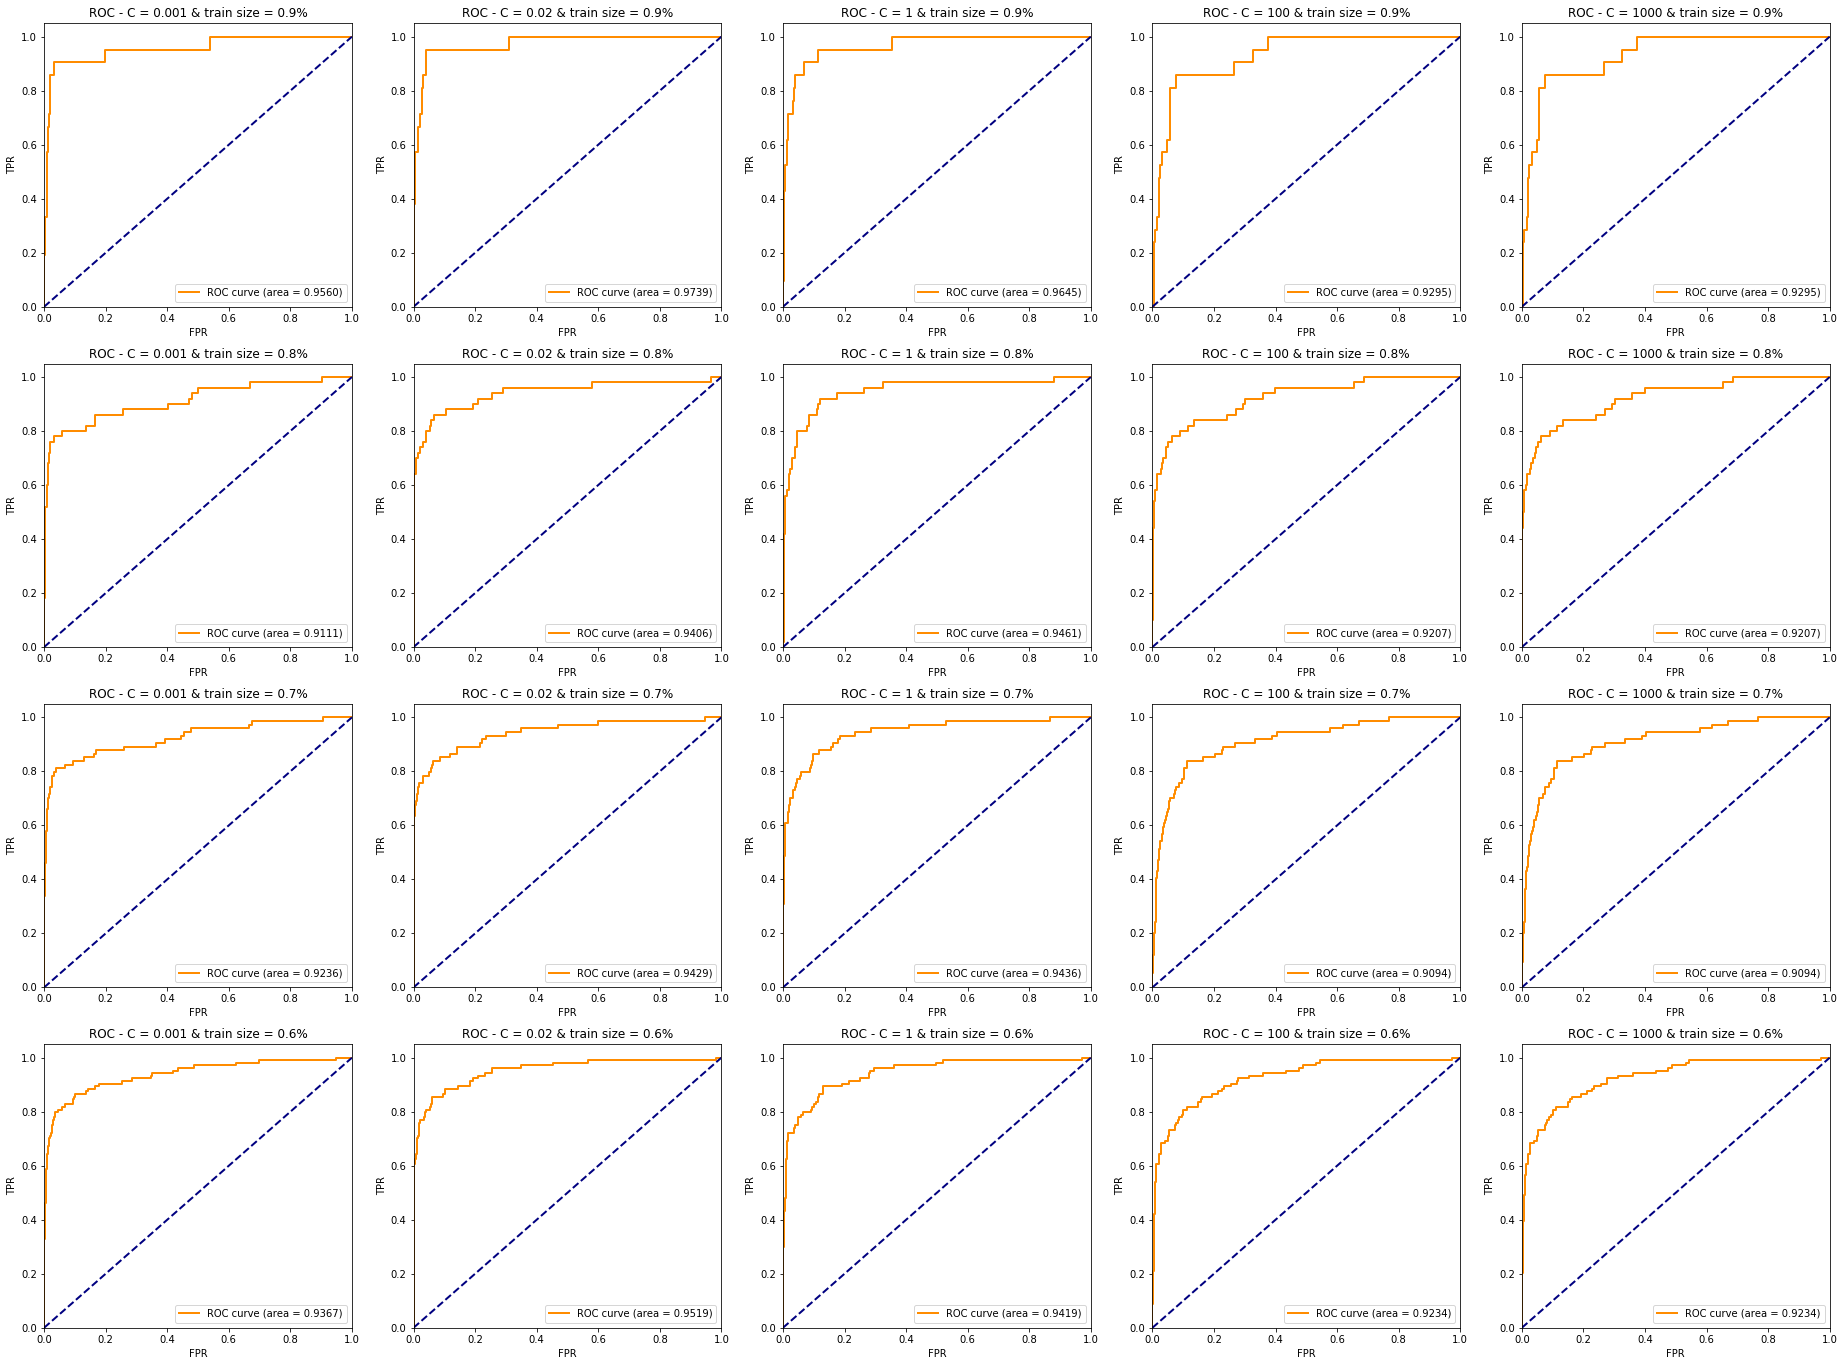

In [53]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

scaler = StandardScaler()
plt.figure(figsize=(12,12))
roc_auc_results = []
splits = [ 0.9, 0.8, 0.7, 0.6 ]
Cs = [0.001, 0.02, 1, 100, 1000]
classes = [1,2,3,4,5,6,7,8]

# Binarize the target class to be proper work with OneVsAll method
y = label_binarize(labelNums, classes=classes)
n_classes = y.shape[1]

subplot = 1
lw = 2
plt.figure(figsize=(32,24))

# Test for different split sizes
for split in splits:
    h_train, h_test, y_train, y_test = train_test_split(histograms, y, random_state=0, train_size=split, test_size=(1-split))
    X_train_scaled = scaler.fit_transform(h_train)
    X_test_scaled = scaler.transform(h_test)
    
    # Test different C parameters
    for C in Cs:
        svc = OneVsRestClassifier(SVC(kernel='linear', C=C, probability=True, random_state=0, max_iter=1000))
        svc.fit(X_train_scaled, y_train)
        
        y_score = svc.decision_function(X_test_scaled)
        
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        # Add Area under curve to the array with the params
        roc_auc_results.append({'roc_auc': roc_auc[2], 'C': C, 'split': split})
        
        plt.subplot(len(splits),len(Cs),subplot)
        subplot += 1
        plt.plot(fpr[2], tpr[2], color='darkorange',
                 lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[2])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC - C = {} & train size = {}%'.format(C, split))
        plt.legend(loc="lower right")
plt.show()

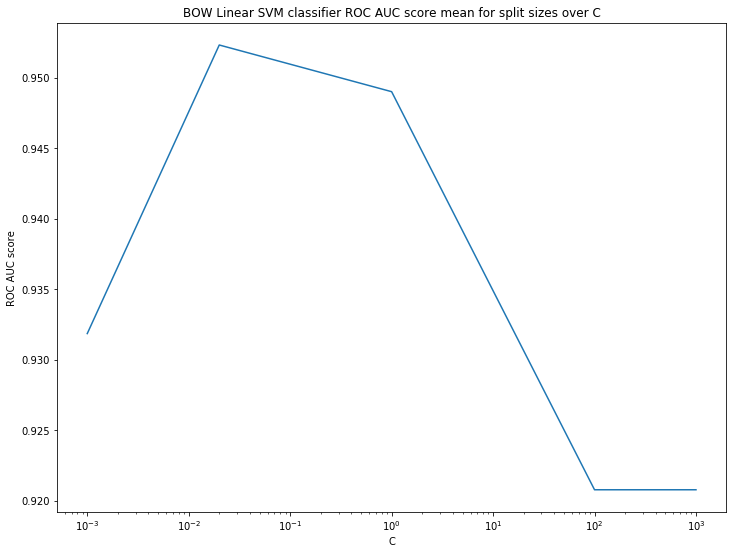

In [55]:
import pandas as pd

df = pd.DataFrame(roc_auc_results)
plt.figure(figsize=(12,9))
plt.plot(df.groupby('C').agg(np.mean).index, df.groupby('C').agg(np.mean)['roc_auc'])
plt.xlabel('C')
plt.ylabel('ROC AUC score')
plt.title('BOW Linear SVM classifier ROC AUC score mean for split sizes over C')
plt.xscale("log")

In [70]:
d = df[df['split']==0.8]

# Calculate max roc auc score
max_roc_auc = np.max(d['roc_auc'])
max_C = d[d['roc_auc'] == max_roc_auc]['C'].values[0]

# Calculate mean roc auc score
mean_roc_auc = np.mean(d['roc_auc'])

print("80%/20% split, The C parameter that maximize the roc auc score is: {}".format(max_C))
print("80%/20% split,  The mean of ROC AUC score for all the different C parameters is: {}".format(mean_roc_auc))

80%/20% split, The C parameter that maximize the roc auc score is: 1.0
80%/20% split,  The mean of ROC AUC score for all the different C parameters is: 0.927844262295082


# Part 2 Q2

In [71]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.layers import Input
input_tensor = Input(shape=(None, None, 3))
model = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
print(model.summary())

Using TensorFlow backend.


58892288/58889256 [==============================] - 77s 1us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_____________________________________________________________

In [93]:
ims = np.array(images)
ims = preprocess_input(ims)

# Predict descriptors
pred = model.predict(ims)

In [104]:
pred.reshape(pred.shape[0]*pred.shape[1]*pred.shape[2], pred.shape[3]).shape

(172032, 512)

In [141]:
pred.reshape(pred.shape[0], pred.shape[1]*pred.shape[2], pred.shape[3]).shape

(2688, 64, 512)

In [135]:
# Layout descriptors over 2D matrix
descriptors = pred.reshape(pred.shape[0]*pred.shape[1]*pred.shape[2], pred.shape[3])

# Match labels
o = np.ones((1, pred.shape[1] * pred.shape[2]))
y = labelNums.reshape(labelNums.shape[0], 1) @ o
y = y.reshape(-1)

x_train, x_test, y_train, y_test = train_test_split(descriptors, y, random_state=0, train_size=0.8, test_size=0.2)

In [136]:
n_clust = 128

kmeans_tnsr = MiniBatchKMeans(n_clusters=n_clust, batch_size=1000, verbose=True)
%time kmeans_tnsr.fit(x_train)

Init 1/3 with method: k-means++
Inertia for init 1/3: 38719128.000000
Init 2/3 with method: k-means++
Inertia for init 2/3: 39528652.000000
Init 3/3 with method: k-means++
Inertia for init 3/3: 39440588.000000
Minibatch iteration 1/13800: mean batch inertia: 14177.740000, ewa inertia: 14177.740000 
Minibatch iteration 2/13800: mean batch inertia: 14993.938000, ewa inertia: 14189.601102 
Minibatch iteration 3/13800: mean batch inertia: 12882.907000, ewa inertia: 14170.612043 
Minibatch iteration 4/13800: mean batch inertia: 14222.826000, ewa inertia: 14171.370823 
Minibatch iteration 5/13800: mean batch inertia: 13890.074000, ewa inertia: 14167.282979 
Minibatch iteration 6/13800: mean batch inertia: 13609.627000, ewa inertia: 14159.179046 
Minibatch iteration 7/13800: mean batch inertia: 12643.481000, ewa inertia: 14137.152713 
Minibatch iteration 8/13800: mean batch inertia: 13676.094000, ewa inertia: 14130.452544 
Minibatch iteration 9/13800: mean batch inertia: 13434.824000, ewa ine

Minibatch iteration 92/13800: mean batch inertia: 12993.392000, ewa inertia: 13316.190570 
Minibatch iteration 93/13800: mean batch inertia: 12356.662000, ewa inertia: 13302.246568 
Minibatch iteration 94/13800: mean batch inertia: 12335.726000, ewa inertia: 13288.200958 
Minibatch iteration 95/13800: mean batch inertia: 12566.768000, ewa inertia: 13277.716995 
Minibatch iteration 96/13800: mean batch inertia: 12392.094000, ewa inertia: 13264.847000 
Minibatch iteration 97/13800: mean batch inertia: 12408.840000, ewa inertia: 13252.407388 
[MiniBatchKMeans] Reassigning 2 cluster centers.
Minibatch iteration 98/13800: mean batch inertia: 12504.102000, ewa inertia: 13241.532911 
Minibatch iteration 99/13800: mean batch inertia: 12684.274000, ewa inertia: 13233.434748 
Minibatch iteration 100/13800: mean batch inertia: 13675.638000, ewa inertia: 13239.860906 
Minibatch iteration 101/13800: mean batch inertia: 13052.664000, ewa inertia: 13237.140535 
Minibatch iteration 102/13800: mean bat

Minibatch iteration 187/13800: mean batch inertia: 12466.471000, ewa inertia: 12895.580610 
Minibatch iteration 188/13800: mean batch inertia: 12253.562000, ewa inertia: 12886.250707 
Minibatch iteration 189/13800: mean batch inertia: 12323.816000, ewa inertia: 12878.077328 
Minibatch iteration 190/13800: mean batch inertia: 13142.038000, ewa inertia: 12881.913241 
Minibatch iteration 191/13800: mean batch inertia: 13324.379000, ewa inertia: 12888.343215 
Minibatch iteration 192/13800: mean batch inertia: 12394.878000, ewa inertia: 12881.172110 
Minibatch iteration 193/13800: mean batch inertia: 12890.615000, ewa inertia: 12881.309336 
Minibatch iteration 194/13800: mean batch inertia: 13590.339000, ewa inertia: 12891.613052 
Minibatch iteration 195/13800: mean batch inertia: 12218.372000, ewa inertia: 12881.829421 
Minibatch iteration 196/13800: mean batch inertia: 13142.598000, ewa inertia: 12885.618945 
Minibatch iteration 197/13800: mean batch inertia: 13395.176000, ewa inertia: 12

MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=128, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=True)

In [142]:
histograms_tnsr = []

# For every decriptive image create a histogram and add to the histograms dataset
for image in pred.reshape(pred.shape[0], pred.shape[1]*pred.shape[2], pred.shape[3]):
    # predict cluster for each image descriptor
    clusters = kmeans_tnsr.predict(image)
    
    #create histogram for associated clusters to descriptors
    hist, _ = np.histogram(clusters, range(n_clust+1))
    histograms_tnsr.append(hist)

histograms_tnsr = np.array(histograms_tnsr)

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packag

C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packag

C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packag

C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\nitza\Anaconda3\lib\site-packag

<Figure size 864x864 with 0 Axes>

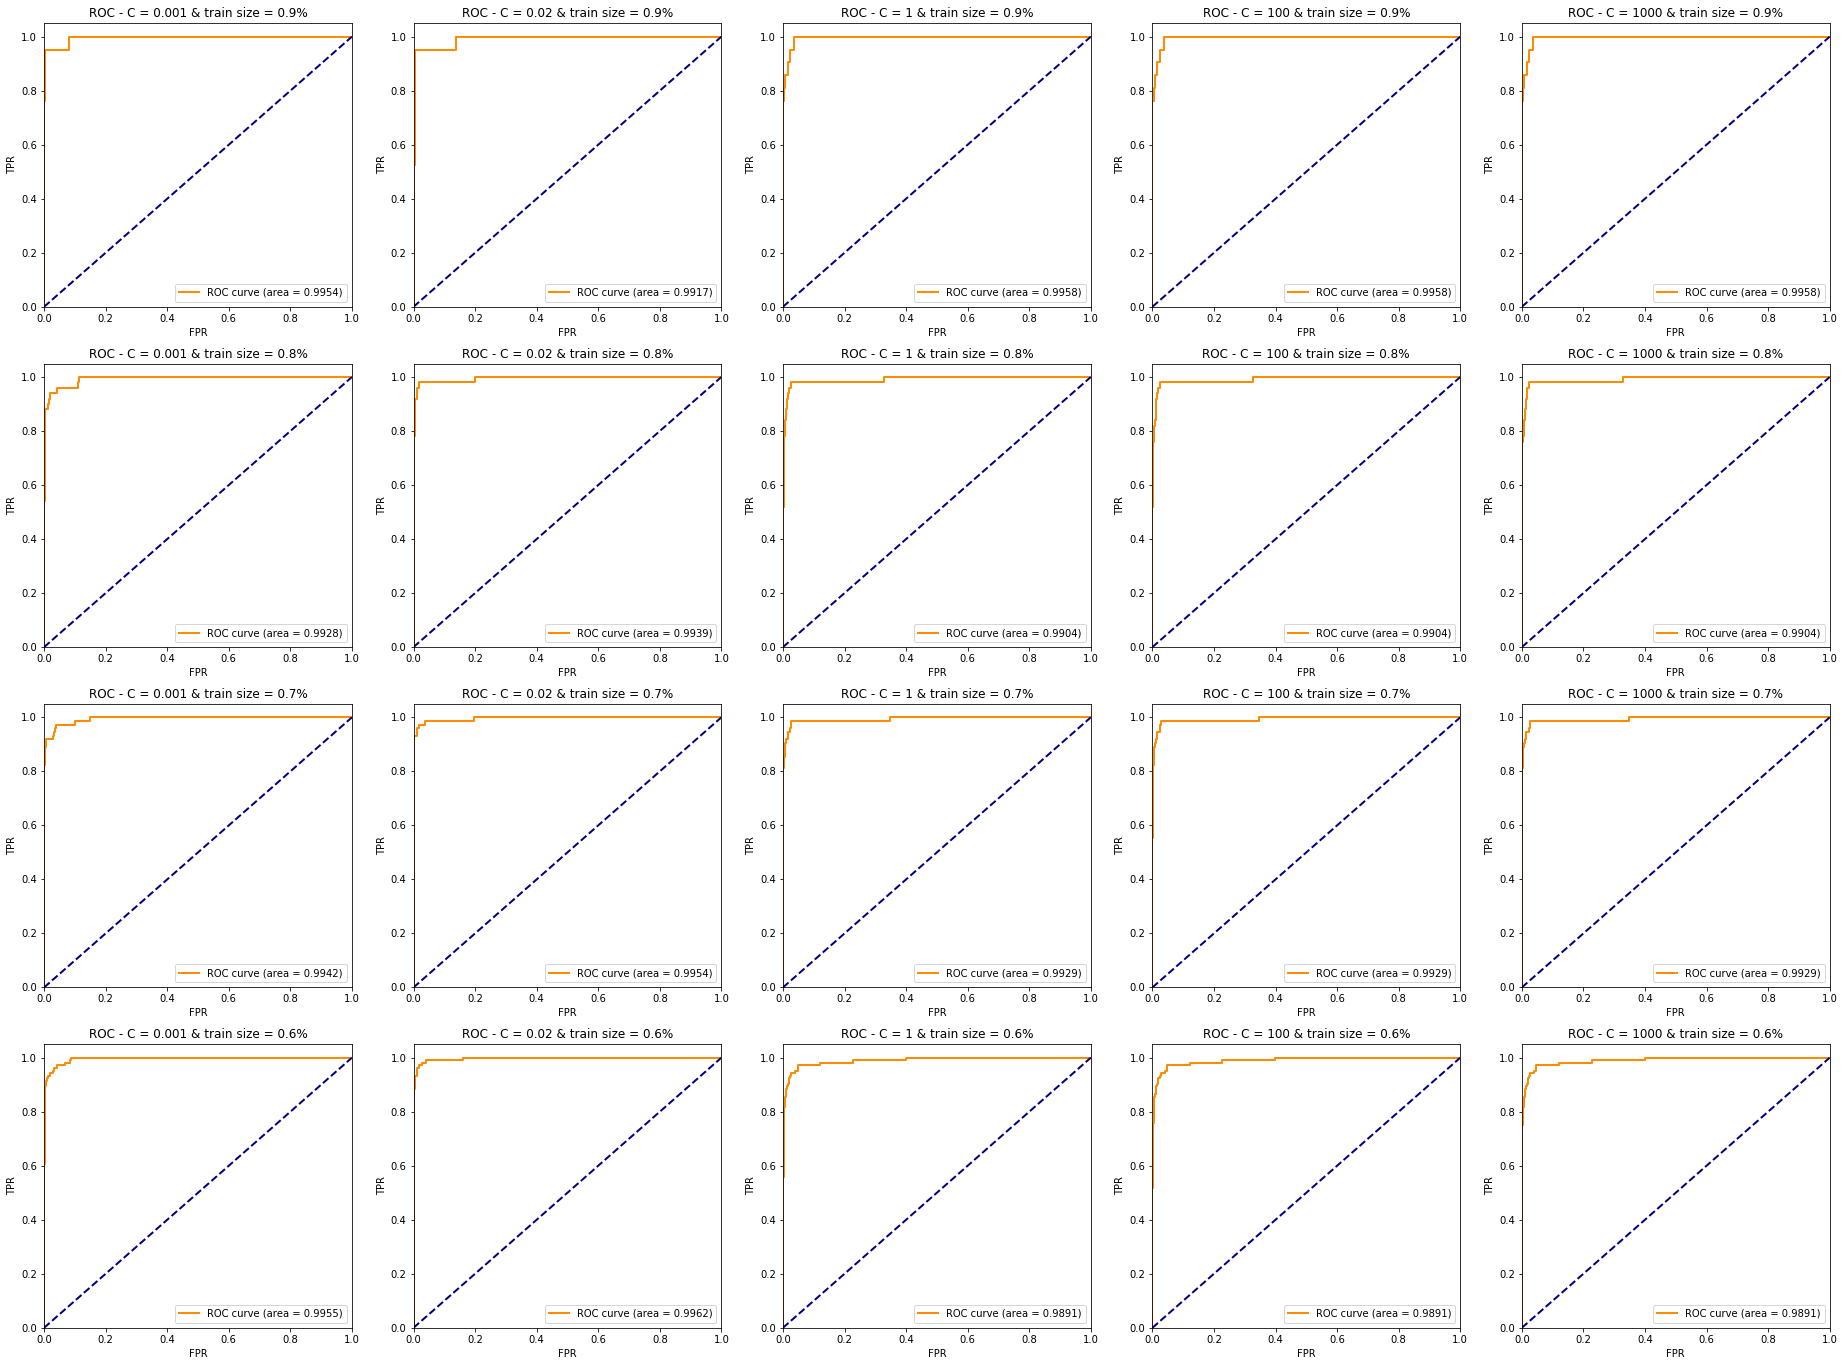

In [151]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

scaler = StandardScaler()
plt.figure(figsize=(12,12))
roc_auc_results = []
splits = [ 0.9, 0.8, 0.7, 0.6 ]
Cs = [0.001, 0.02, 1, 100, 1000]
classes = [1,2,3,4,5,6,7,8]

# Binarize the target class to be proper work with OneVsAll method
y = label_binarize(labelNums, classes=classes)
n_classes = y.shape[1]

subplot = 1
lw = 2
plt.figure(figsize=(32,24))

# Test for different split sizes
for split in splits:
    h_train, h_test, y_train, y_test = train_test_split(histograms_tnsr, y, random_state=0, train_size=split, test_size=(1-split))
    X_train_scaled = scaler.fit_transform(h_train)
    X_test_scaled = scaler.transform(h_test)
    
    # Test different C parameters
    for C in Cs:
        svc = OneVsRestClassifier(SVC(kernel='linear', C=C, probability=True, random_state=0, max_iter=1000))
        svc.fit(X_train_scaled, y_train)
        
        y_score = svc.decision_function(X_test_scaled)
        
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        # Add Area under curve to the array with the params
        roc_auc_results.append({'roc_auc': roc_auc[2], 'C': C, 'split': split})
        
        plt.subplot(len(splits),len(Cs),subplot)
        subplot += 1
        plt.plot(fpr[2], tpr[2], color='darkorange',
                 lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[2])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC - C = {} & train size = {}%'.format(C, split))
        plt.legend(loc="lower right")
plt.show()

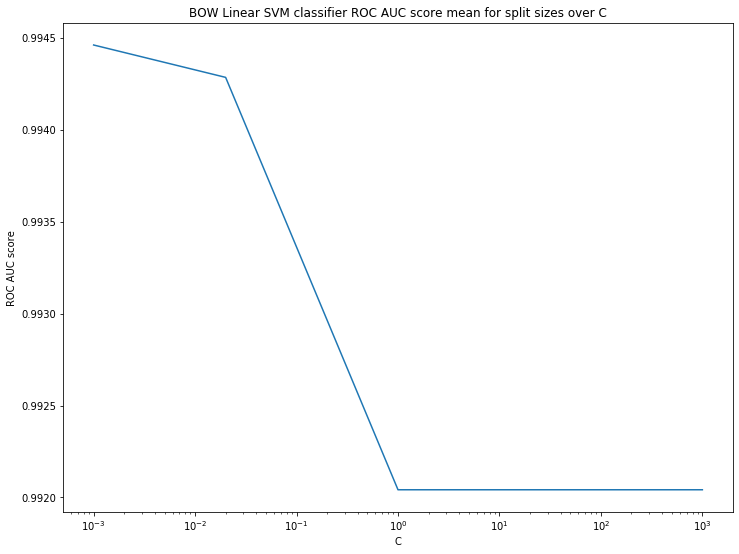

In [152]:
import pandas as pd

df = pd.DataFrame(roc_auc_results)
plt.figure(figsize=(12,9))
plt.plot(df.groupby('C').agg(np.mean).index, df.groupby('C').agg(np.mean)['roc_auc'])
plt.xlabel('C')
plt.ylabel('ROC AUC score')
plt.title('BOW Linear SVM classifier ROC AUC score mean for split sizes over C')
plt.xscale("log")

In [154]:
# Only the 80/20 split
d = df[df['split']==0.8]

# Calculate max roc auc score
max_roc_auc = np.max(d['roc_auc'])
max_C = d[d['roc_auc'] == max_roc_auc]['C'].values[0]

# Calculate mean roc auc score
mean_roc_auc = np.mean(d['roc_auc'])

print("80%/20% split, The C parameter that maximize the roc auc score is: {}".format(max_C))
print("80%/20% split,  The mean of ROC AUC score for all the different C parameters is: {}".format(mean_roc_auc))

80%/20% split, The C parameter that maximize the roc auc score is: 0.02
80%/20% split,  The mean of ROC AUC score for all the different C parameters is: 0.9915573770491803
